<a href="https://colab.research.google.com/github/ziemmi13/Genetic-algorythm---scheduling-tasks/blob/master/DLF_winter_2024_lab_1_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choosing the correct environment for AI workloads

In order to access GPU computations it is necessary to change the runtime.
I the top menu choose: Runtime -> Change runtime type -> T4 GPU (free version) or A100/L4 GPU (paid version).

Free version has limitations (like limited availability or constraints on computation time).

---

# Working with Google Colab

## Adding and moving cells
You can add new cells by using the **+ CODE** and **+ TEXT** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and clicking **Cell Up** or **Cell Down** in the top toolbar.

Consecutive cells can be selected by "lasso selection" by dragging from outside one cell and through the group.  Non-adjacent cells can be selected concurrently by clicking one and then holding down Ctrl while clicking another.  Similarly, using Shift instead of Ctrl will select all intermediate cells.

## System aliases

Jupyter includes shortcuts for common operations, such as ls:

In [1]:
!ls /bin

'['				      mkdir
 7z				      mkfifo
 7za				      mknod
 7zr				      mktemp
 aclocal			      mm2gv
 aclocal-1.16			      more
 acyclic			      mount
 add-apt-repository		      mountpoint
 addpart			      mpexpand
 addr2line			      mpic++
 aggregate_profile		      mpicc
 apropos			      mpiCC
 apt				      mpicc.openmpi
 apt-add-repository		      mpiCC.openmpi
 apt-cache			      mpic++.openmpi
 apt-cdrom			      mpicxx
 apt-config			      mpicxx.openmpi
 apt-extracttemplates		      mpiexec
 apt-ftparchive			      mpiexec.openmpi
 apt-get			      mpif77
 apt-key			      mpif77.openmpi
 apt-mark			      mpif90
 apt-sortpkgs			      mpif90.openmpi
 ar				      mpifort
 arch				      mpifort.openmpi
 as				      mpijavac
 asan_symbolize			      mpijavac.pl
 asan_symbolize-14		      mpirun
 autoconf			      mpirun.openmpi
 autoheader			      mv
 autom4te			      mysql_config
 automake			      namei
 automake-1.16			      nawk
 autoreconf			      nc-config
 autoscan			      ncurses5-conf

That `!ls` probably generated a large output. You can select the cell and clear the output by either right clicking the left gutter of the output area and selecting "Clear output" from the context menu.

Execute any other process using `!` with string interpolation from python variables, and note the result can be assigned to a variable:

## Commenting on a cell
You can comment on a Colaboratory notebook like you would on a Google Document. Comments are attached to cells, and are displayed next to the cell they refer to. If you have **comment-only** permissions, you will see a comment button on the top right of the cell when you hover over it.

If you have edit or comment permissions you can comment on a cell in one of three ways:

1. Select a cell and click the comment button in the toolbar above the top-right corner of the cell.
1. Right click a text cell and select **Add a comment** from the context menu.
3. Use the shortcut **Ctrl+Shift+M** to add a comment to the currently selected cell.

You can resolve and reply to comments, and you can target comments to specific collaborators by typing *+[email address]* (e.g., `+user@domain.com`). Addressed collaborators will be emailed.

The Comment button in the top-right corner of the page shows all comments attached to the notebook.

# Mounting Google Drive in your VM

The example below shows how to mount your Google Drive in your virtual machine using an authorization code, and shows a couple of ways to write & read files there. Once executed, observe the new file (`foo.txt`) is visible in https://drive.google.com/

Note this only supports reading and writing files.

In [3]:
from google.colab import drive

# Authenticate and mount Google Drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [7]:
with open('/gdrive/My Drive/Colab Notebooks/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/Colab Notebooks/foo.txt'

Hello Google Drive!

# Saving data to Google Drive

* [PyDrive reference](https://pythonhosted.org/PyDrive/)
* [Google Drive API reference](https://developers.google.com/drive/v3/reference/)

In [8]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1lqMUwdQnDf4_7m26Wy5yNpKB4d-l6qVx


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After executing the cell above, a new file named 'Sample file.txt' will appear in your [drive.google.com](https://drive.google.com/) file list.

# Listing files in Google Drive

In [10]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Sample file.txt, id 1lqMUwdQnDf4_7m26Wy5yNpKB4d-l6qVx
title foo.txt, id 1-4uuQIrE3EM_25B6ojGxQm6XD11ll2Ol
title foo.txt, id 1CXK3uzNk7OKTSZNimO-P_u5ZCQCxPIGF


# Downloading files or importing data from Google Drive

* [PyDrive reference](https://pythonhosted.org/PyDrive/)
* [Google Drive API reference](https://developers.google.com/drive/v3/reference/)

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

# Downloading files to your local file system

`files.download` will invoke a browser download of the file to your local computer.


In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

---


# Quick python knowledge verification

A series of tasks to show understanding of the pythonic way of doing things

# Task

In [11]:
# Complete the function and explain why the results differ for list and int.
def modify_values(a_list, a_number):
    a_list.append(100)
    a_number += 100

my_list = [1, 2, 3]
my_number = 5

modify_values(my_list, my_number)

print(my_list)  # What will this print?
print(my_number)  # What will this print?


[1, 2, 3, 100]
5


# Solution

In [ ]:
# Complete the function and explain why the results differ for list and int.
def modify_values(a_list, a_number):
    a_list.append(100)
    a_number += 100

my_list = [1, 2, 3]
my_number = 5

modify_values(my_list, my_number)

print(my_list)  # [1,2,3,100] because list is mutable - modified in place
print(my_number)  # 5 because int is immutable - a copy was modified


# Task

In [ ]:
# unpacking variables
# Try to unpack values into the correct number of variables
# Fix the errors by handling them properly
data = [1, 2, 3, 4, 5]

try:
    a, b = data  # Fix this line to unpack without error
except ValueError as e:
    print(e)


# Solution

In [15]:
data = [1, 2, 3, 4, 5]

try:
    a, b, *rest = data  # Fix this line to unpack without error
except ValueError as e:
    print(e)

print(a, b, rest)

1 2 [3, 4, 5]


# Task

In [ ]:
# Use the zip function to combine the two lists element-wise
names = ['Alice', 'Bob', 'Charlie']
scores = [85, 90, 88]

# Combine names and scores using zip
combined = ____________

# Now, unpack and print the combined data
for name, score in combined:
    print(name, score)

# What happens if one list is longer than the other?
# Try with different-length lists
names = ['Alice', 'Bob']
scores = [85, 90, 88]
combined = ____________

# Unpack and print again
for name, score in combined:
    print(name, score)


# Solution

In [18]:
# Use the zip function to combine the two lists element-wise
names = ['Alice', 'Bob', 'Charlie']
scores = [85, 90, 88]

# Combine names and scores using zip
combined = zip(names,scores)

# Now, unpack and print the combined data
for name, score in combined:
    print(name, score)

# What happens if one list is longer than the other?
# Try with different-length lists
names = ['Alice', 'Bob']
scores = [85, 90, 88]
combined = zip(names, scores)

# Unpack and print again
for name, score in combined:
    print(name, score)


Alice 85
Bob 90
Charlie 88
Alice 85
Bob 90


The longer list is being cut

# Task

In [22]:
# Complete the list comprehension to create a list of tuples (x, y)
# where x is from the range 1 to 10, and y is x squared.
# However, only include pairs where x + y is divisible by 3.

result = [(x, y) for x in range '(...)' ]
print(result)

[(2, 4), (3, 9), (5, 25), (6, 36), (8, 64), (9, 81)]


# Solution

In [23]:
result = [(x, x**2) for x in range(1,11) if (x + x**2) % 3 == 0]
print(result)

[(2, 4), (3, 9), (5, 25), (6, 36), (8, 64), (9, 81)]


# Task

In [26]:
# common pitfall of using mutable default arguments in Python functions

def append_to_list(item, target_list=[]):
    target_list.append(item)
    return target_list

# Predict the output of the following calls:
print(append_to_list(1))
print(append_to_list(2))
print(append_to_list(3, []))
print(append_to_list(4))

# Explain why this happens and how to fix it.

[1]
[1, 2]
[3]
[1, 2, 4]


# Solution

This happens because the empty target list isnt created everytime the function is called, to solve the problem, we need to create it everytime its not provided - is None

In [29]:
def append_to_list(item, target_list=None):
    if target_list is None:
        target_list = []
    target_list.append(item)
    return target_list

print(append_to_list(1))
print(append_to_list(2))
print(append_to_list(3, []))
print(append_to_list(4))


[1]
[2]
[3]
[4]


# Task

In [30]:
# knowledge of generator expressions and their memory efficiency compared to list comprehensions. It's important for working with large datasets or streams of data.
import sys

# Create a list of squares of numbers from 0 to 999999
list_comp = [x**2 for x in range(1000000)]

# Create a generator expression of squares of numbers from 0 to 999999
gen_exp = (x**2 for x in range(1000000))

# Print the memory size of both objects
print(f"List comprehension size: {sys.getsizeof(list_comp)} bytes")
print(f"Generator expression size: {sys.getsizeof(gen_exp)} bytes")

# Explain the difference in size and when you would use each.

List comprehension size: 8448728 bytes
Generator expression size: 104 bytes


# Solution

The difference in size is caused by the fact, that a list stores all of the values at once, while a generator generates values only if needed.
I would use a list if i need to find a specific value, and a generator if i want to iterate over the values one by one

# Task

In [31]:
# distinction between identity comparison (is) and value comparison (==) in Python,
# Predict the output of the following comparisons:

a = [1, 2, 3]
b = [1, 2, 3]
c = b

print(a == b)
print(a is b)
print(b is c)

x = 256
y = 256
z = 257
w = 257

print(x is y)
print(z is w)

# Explain the results and when to use `is` vs `==`.

True
False
True
True
False


# Solution

'is' returns True if the objects are the same, while '=' returns True while the values are the same. a == b, because the values are the same a isnt b, because its a different object b is c, because c references b so its the same memory location x is y, because the values are the same z is not w, because its not in range (-5, 256) - integers from this range refer to the same cached object

# Task

In [ ]:
# Try to create dictionaries with the following as keys:
# 1. An integer
# 2. A string
# 3. A tuple containing only immutable elements
# 4. A tuple containing a list
# 5. A list

# Explain which ones work and why. Then, implement a custom class that
# can be used as a dictionary key, and one that cannot.

# TODO: code here

# Solution

In [42]:
# Those work
dict1 = {1: "one"}
dict2 = {'a': "one"}
dict3 = {(1, 2): "one"}

In [41]:
# Those wont work
# dict4 = {([1, 2]): "one"}
# dict5 = {[1, 2]: "one"}

keys of a dict must be imutable and unique

In [72]:
# class that can be used
class WorkingKey:
  def __init__(self, key):
    self.key = key
  def __hash__(self):
    return hash(self.key)
  def __eq__(self, other):
    return self.key == other.key
  def __repr__(self):
    return str(self.key)

In [73]:
# class that cant be used
class NotWorkingKey:
  def __init__(self, key):
    self.key = key

# Task

In [ ]:
#  difference between copy() and deepcopy()

import copy

original = [[1, 2, 3], [4, 5, 6]]
shallow_copy = original.copy()
deep_copy = copy.deepcopy(original)

# Modify the original list
original[0][0] = 'X'

# Print all three lists
print("Original:", original)
print("Shallow copy:", shallow_copy)
print("Deep copy:", deep_copy)

# Explain the output and the difference between shallow and deep copy


# Solution

Shallow copy creates a view of the original, whereas deepcopy creates an actual copy

# Task

In [ ]:
def fibonacci_generator():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

# Use the generator to print the first 10 Fibonacci numbers
fib_gen = fibonacci_generator()
for _ in range(10):
    print(next(fib_gen))

# Explain how the generator works and why it's memory-efficient

# Solution

The generator creates another Fibonacci number one at a time only if the function next is called.
Its memory-efficient because it doesnt store an entire sequence in memory, instead it creates one value and discards the old ones from memory

# Pandas
https://colab.research.google.com/notebooks/snippets/pandas.ipynb

## Pandas DataFrame: Create from lists of values

In [74]:
import pandas as pd

last_names = ['Connor', 'Connor', 'Reese']
first_names = ['Sarah', 'John', 'Kyle']
df = pd.DataFrame({
  'first_name': first_names,
  'last_name': last_names,
})
df

,first_name,last_name
0,Sarah,Connor
1,John,Connor
2,Kyle,Reese


## Pandas DataFrame: Rename multiple Columns

In [75]:
import pandas as pd
df = pd.DataFrame({
    'Year': [2016, 2015, 2014, 2013, 2012],
    'Top Animal': ['Giant panda', 'Chicken', 'Pig', 'Turkey', 'Dog']
})

df.rename(columns={
    'Year': 'Calendar Year',
    'Top Animal': 'Favorite Animal',
}, inplace=True)
df

,Calendar Year,Favorite Animal
0,2016,Giant panda
1,2015,Chicken
2,2014,Pig
3,2013,Turkey
4,2012,Dog


## Pandas DataFrame: Query by regexp (regular expression)

In [76]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle', 'Joe'],
  'last_name': ['Connor', 'Connor', 'Reese', 'Bonnot'],
})

df[df.last_name.str.match('.*onno.*')]

,first_name,last_name
0,Sarah,Connor
1,John,Connor
3,Joe,Bonnot


## Pandas DataFrame: Query by variable value
Evaluate a variable as the value to find.

In [77]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle'],
  'last_name': ['Connor', 'Connor', 'Reese'],
})

foo = 'Connor'
df.query('last_name == @foo')

,first_name,last_name
0,Sarah,Connor
1,John,Connor


## Pandas DataFrame: Query using variable value as a column name

Evaluate a variable, to use its value as the name of a column in a query.

E.g. Query for rows where `John` is the value in the column named `first_name`.

In [78]:
import pandas as pd
df = pd.DataFrame(data={
  'first_name': ['Sarah', 'John', 'Kyle'],
  'last_name': ['Connor', 'Connor', 'Reese'],
})

column_name = 'first_name'
df.query(f"`{column_name}` == 'John'")


,first_name,last_name
1,John,Connor


## Pandas DataFrame: Query by Timestamp above a value

In [79]:
import pandas as pd
df = pd.DataFrame({
  'time': ['2022-09-14 00:52:00-07:00', '2022-09-14 00:52:30-07:00',
           '2022-09-14 01:52:30-07:00'],
  'letter': ['A', 'B', 'C'],
})
df['time'] = pd.to_datetime(df.time)

df.query('time >= "2022-09-14 00:52:30-07:00"')

,time,letter
1,2022-09-14 00:52:30-07:00,B
2,2022-09-14 01:52:30-07:00,C


## Pandas DataFrame: Query for Timestamp between two values

In [80]:
import pandas as pd
df = pd.DataFrame({
  'time': ['2022-09-14 00:52:00-07:00', '2022-09-14 00:52:30-07:00',
           '2022-09-14 01:52:30-07:00'],
  'letter': ['A', 'B', 'C'],
})
df['time'] = pd.to_datetime(df.time)

begin_ts = '2022-09-14 00:52:00-07:00'
end_ts = '2022-09-14 00:54:00-07:00'

df.query('@begin_ts <= time < @end_ts')

,time,letter
0,2022-09-14 00:52:00-07:00,A
1,2022-09-14 00:52:30-07:00,B


## Pandas DataFrame: Drop duplicate rows

In [81]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle', 'Joe'],
  'last_name': ['Connor', 'Connor', 'Reese', 'Bonnot'],
})
df.set_index('last_name', inplace=True)

df.loc[~df.index.duplicated(), :]

,first_name
last_name,
Connor,Sarah
Reese,Kyle
Bonnot,Joe


## Pandas DataFrame: Ignore one Column

In [82]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle', 'Joe'],
  'last_name': ['Connor', 'Connor', 'Reese', 'Bonnot'],
})

df.loc[:, df.columns!='last_name']

,first_name
0,Sarah
1,John
2,Kyle
3,Joe



# Working with external datasets
## Kaggle access

In [83]:
# https://www.kaggle.com/discussions/general/74235

!pip install -q kaggle

In [84]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"michamiszczobrocki","key":"a11a267dd109683d02aafe8f992f5b2b"}'}

In [85]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [86]:
!kaggle datasets list
# https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
# https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success
# https://www.kaggle.com/datasets/uciml/student-alcohol-consumption


ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                       Student Performance Factors                         94KB  2024-09-02 10:53:57          34269        607  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset   Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12           6403        116  1.0              
abdulszz/spotify-most-streamed-songs                          Spotify Most Streamed Songs                         60KB  2024-09-07 18:23:14          13558        175  1.0              
valakhorasani/gym-members-exercise-dataset                    Gym Members E

In [87]:
!kaggle datasets download -d syedfaizanalii/predict-students-dropout-and-academic-success

Dataset URL: https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success
License(s): apache-2.0
  0% 0.00/105k [00:00<?, ?B/s]
100% 105k/105k [00:00<00:00, 90.0MB/s]


In [88]:
!kaggle datasets download -d  lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 89.9MB/s]


In [89]:
!kaggle datasets download -d uciml/student-alcohol-consumption

Dataset URL: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption
License(s): CC0-1.0
  0% 0.00/18.4k [00:00<?, ?B/s]
100% 18.4k/18.4k [00:00<00:00, 36.2MB/s]


In [90]:
!ls

drive	     predict-students-dropout-and-academic-success.zip	student-alcohol-consumption.zip
kaggle.json  sample_data					student-performance-factors.zip


In [91]:
!mkdir students
!unzip -o predict-students-dropout-and-academic-success.zip -d students
!unzip -o student-performance-factors.zip -d students
!unzip -o student-alcohol-consumption.zip -d students

Archive:  predict-students-dropout-and-academic-success.zip
  inflating: students/Predict Student Dropout and Academic Success.csv  
Archive:  student-performance-factors.zip
  inflating: students/StudentPerformanceFactors.csv  
Archive:  student-alcohol-consumption.zip
  inflating: students/student-mat.csv  
  inflating: students/student-merge.R  
  inflating: students/student-por.csv  


In [92]:
!ls

drive						   sample_data			    students
kaggle.json					   student-alcohol-consumption.zip
predict-students-dropout-and-academic-success.zip  student-performance-factors.zip


In [ ]:
!ls students

# Task : Read the data in the CSV files using Pandas library, show only two columns from each dataset (for example "Nationality" and "Course")

In [111]:
import pandas as pd
import os

import os
for dirname, _, filenames in os.walk('./students'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# TODO: continue

./students/student-por.csv
./students/StudentPerformanceFactors.csv
./students/student-merge.R
./students/Predict Student Dropout and Academic Success.csv
./students/student-mat.csv


In [112]:
df_student_por = pd.read_csv("./students/student-por.csv")
df_student_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [113]:
df_student_por[["school", "sex"]].head()

,school,sex
0,GP,F
1,GP,F
2,GP,F
3,GP,F
4,GP,F


In [114]:
df_StudentPerformanceFactors = pd.read_csv("./students/StudentPerformanceFactors.csv")
df_StudentPerformanceFactors.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [115]:
df_StudentPerformanceFactors[["Hours_Studied", "Attendance"]].head()

,Hours_Studied,Attendance
0,23,84
1,19,64
2,24,98
3,29,89
4,19,92


In [120]:
df_predict_student_dropout_and_academic_success = pd.read_csv("./students/Predict Student Dropout and Academic Success.csv", delimiter = ";")
df_predict_student_dropout_and_academic_success.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [121]:
df_predict_student_dropout_and_academic_success[["Marital status","Application mode"]].head()

,Marital status,Application mode
0,1,17
1,1,15
2,1,1
3,1,17
4,2,39


In [123]:
df_students_mat = pd.read_csv("./students/student-mat.csv")
df_students_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [125]:
df_students_mat[["school","sex"]].head()

,school,sex
0,GP,F
1,GP,F
2,GP,F
3,GP,F
4,GP,F


# Task: What makes a good dataset?
* ### How big should it be?
* ### What should be the structure of data?
* ### What other factors have to be considered?

---


# Simple operations on images in Google Colab

In [126]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow # different than normal cv2.imshow
import requests
from PIL import Image
import io

# Function to display images side by side
def display_images(images, titles):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:
            axs[i].imshow(img, cmap='gray')
        else:
            axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # take note of this line - assumptions
        axs[i].set_title(title)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()


In [128]:
# 1. Uploading an image from local machine
print("Please upload an image:")
uploaded = files.upload()
file_name = next(iter(uploaded)) # or list(uploaded.keys())[0]
img_upload = cv2.imread(file_name)
print(f"Uploaded image shape: {img_upload.shape}")

Please upload an image:


Saving MainAfter.jpg to MainAfter.jpg
Uploaded image shape: (720, 1280, 3)


In [129]:
# 2. Downloading an image from the web
url = "https://c.pxhere.com/photos/af/95/photo-1614016.jpg!d"
response = requests.get(url)
img_web = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
print(f"Downloaded image shape: {img_web.shape}") # verify the correctness

Downloaded image shape: (800, 1200, 3)


In [130]:
# 3. Reading image using PIL and converting to numpy array
img_pil = Image.open(io.BytesIO(response.content))
img_pil_np = np.array(img_pil)
print(f"PIL image shape: {img_pil_np.shape}")


PIL image shape: (800, 1200, 3)


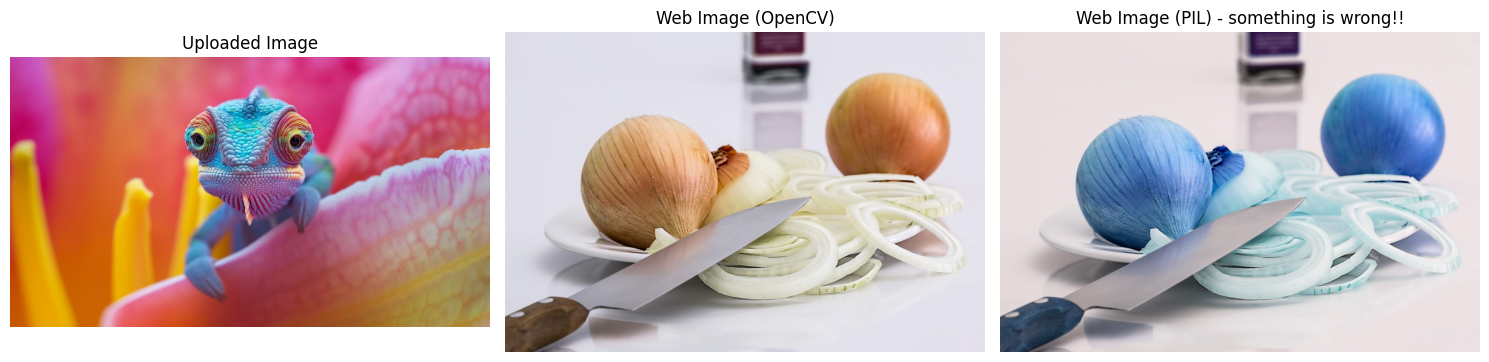

In [131]:
# 4. Displaying images using matplotlib
display_images([img_upload, img_web, img_pil_np],
               ['Uploaded Image', 'Web Image (OpenCV)', 'Web Image (PIL) - something is wrong!!'])

OpenCV display:


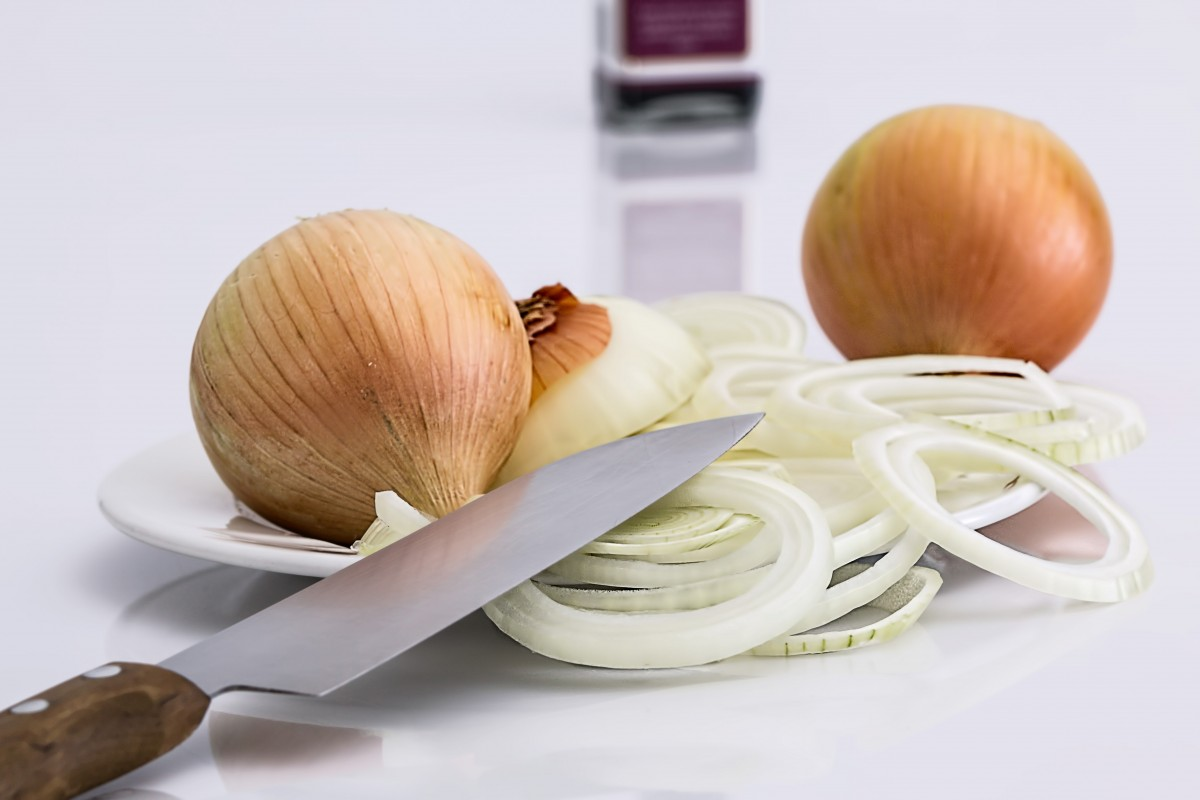

In [132]:
# 5. Displaying image using OpenCV
print("OpenCV display:")
cv2_imshow(img_web)


Comparing OpenCV BGR and RGB:


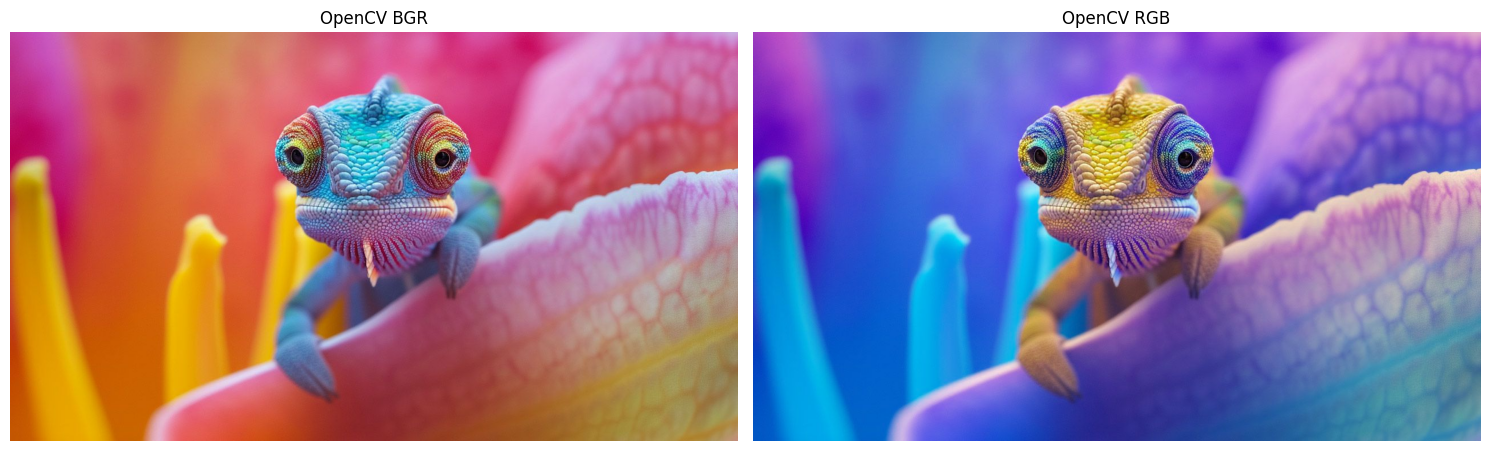

In [133]:
# 6. Converting OpenCV BGR to RGB
uploaded_rgb = cv2.cvtColor(img_upload, cv2.COLOR_BGR2RGB)
print("\nComparing OpenCV BGR and RGB:")
display_images([img_upload, uploaded_rgb], ['OpenCV BGR', 'OpenCV RGB'])


Basic image processing results:


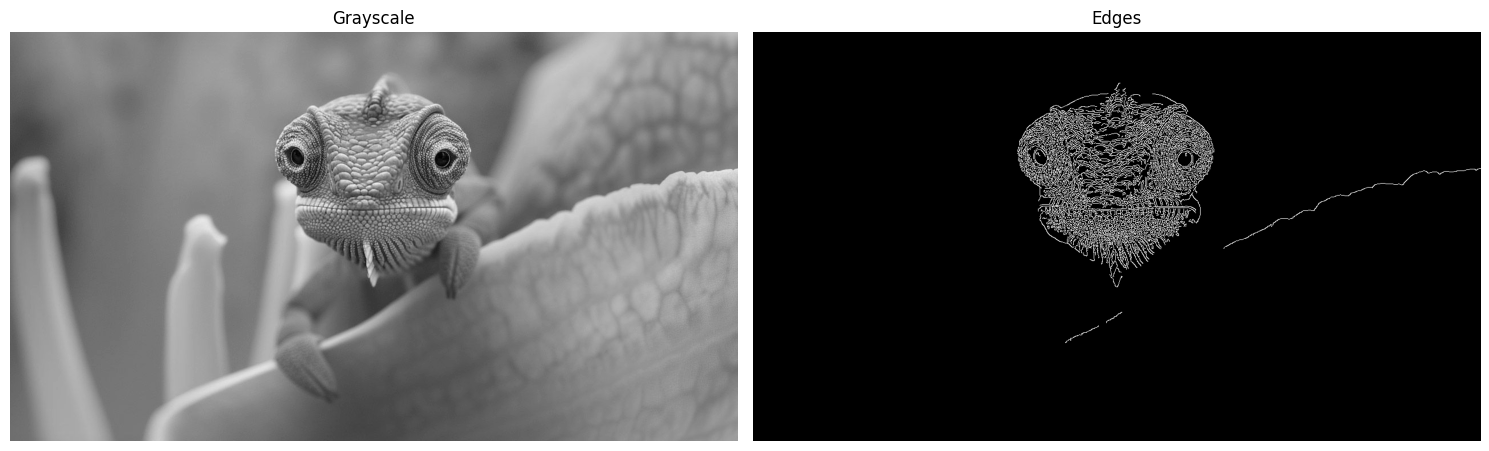

In [135]:
# 7. Basic image processing
gray = cv2.cvtColor(img_upload, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
print("\nBasic image processing results:")
display_images([gray, edges], ['Grayscale', 'Edges'])


In [ ]:
# 8. Saving processed image
cv2.imwrite('processed_image.jpg', edges)
files.download('processed_image.jpg')
print("\nProcessed image has been saved and is ready for download.")